# Simple linear Regression

In [22]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [24]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [26]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
x_data=df[['Weight']]  # Independent feature
y_data=df['Height']  # Dependent feature
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.20,random_state=42)

In [28]:
x_data.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [29]:
y_data.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [31]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(n_jobs=-1)
reg.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [32]:
print ("The Slope = ",reg.coef_)
print ("The Intecept = ",reg.intercept_)

The Slope =  [17.03440872]
The Intecept =  157.5


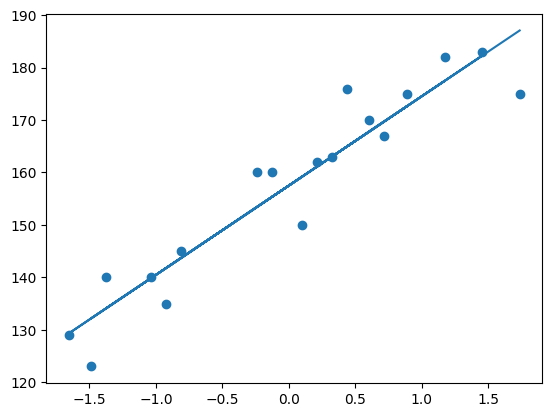

In [33]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train))

#### Prediction of train data
1. Predicted height output = intercept + coef_(Weights)
2. y_pred_train = 156.47 + 17.29(x_train)

#### Prediction of test data
1. Predicted height output = intercept + coef_(Weights)
2. y_pred_test = 156.47 + 17.29(x_test)

In [34]:
y_pred_test=reg.predict(x_test)

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_test)
print('MAE = ',mae)
print('MSE = ',mse)
print('RMSE = ',rmse)
print('R2 score = ',r2)

MAE =  9.822657814519232
MSE =  109.77592599051664
RMSE =  10.477400726827081
R2 score =  0.776986986042344


In [37]:
1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.7026493147231252

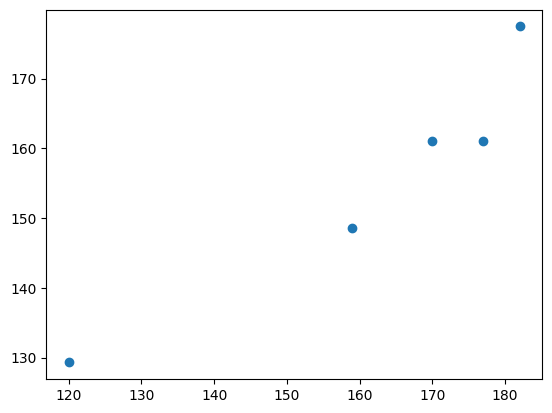

In [38]:
plt.scatter(y_test,y_pred_test)

In [39]:
residual=y_test-y_pred_test

In [40]:
residual

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

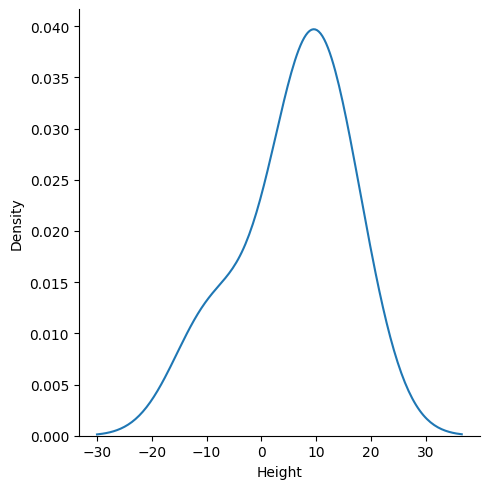

In [44]:
sns.displot(residual,kind='kde')